# 使用dplyr进行数据操作

来源：<http://bioconnector.org/workshops/r-dplyr-yeast.html>

数据分析涉及大量的清理工作——整理和清理数据以利于进行下游分析。**该课程主要讲述高级数据操作技术和利用“拆分-应用-组合”策略进行分析**。

我们将使用R中的`dplyr`包进行有效地操作和计算包含许多观测值的大数据子集的统计特征。

>Recommended reading: Review the [Introduction (10.1)](http://r4ds.had.co.nz/tibbles.html#introduction-4) and [Tibbles vs. data.frame (10.3)](http://r4ds.had.co.nz/tibbles.html#tibbles-vs.data.frame) sections of the R for Data Science book. We will initially be using the read_* functions from the [readr package](http://readr.tidyverse.org/). These functions load data into a tibble instead of R’s traditional data.frame. Tibbles are data frames, but they tweak some older behaviors to make life a little easier. These sections explain the few key small differences between traditional data.frames and tibbles.

**好，那我们先看看这两部分。**我捡要点讲。

## Introduction (10.1)

一个典型的数据科学项目中需要的工具模型应该是这样的：

![](http://r4ds.had.co.nz/diagrams/data-science.png)

1. 首先你要**导入数据**（import）。这意思是把你存储在文件、数据库中或者来自网络API中的数据存储为R中的数据框。
2. 导入之后是**整理数据**（tidy）。简要来说，当你的数据是干净的时候，每一列应该是一个变量，每一行是一个观察值。
3. 整理之后是**转换数据**（transform）。转换包括缩小感兴趣的观察值，根据已知变量创造新的变量，计算一系列的统计特征。将整理和转换放在一起称为**争吵**（wrangling），因为把你的数据变成可以容易处理的形式经常就像一场争辩。
4. 一旦你把数据整理好了，有两种主要产生知识的“引擎”：**可视化**和**建模**。它们有互补的长处和短处，所以真正的分析经常会将两个过程重叠多次。
5. 数据科学的最后一步是**交流**，这绝对是数据分析项目最重要的一部分。除非你能和别人交流你的结果，不然你前面做的太多也是白扯。

伴随着整个过程的工具就是**编程**。

### 安装tidyverse包

`tidyverse`包含有几个包，它们享有共同的数据与R编程理念，它们被设计到一起进行流畅的工作。

```R
# 安装
install.packages("tidyverse")
```


```R
# 载入
> library(tidyverse)
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ readr   1.1.1
√ tibble  1.3.4     √ purrr   0.2.4
√ tidyr   0.7.2     √ stringr 1.2.0
√ ggplot2 2.2.1     √ forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
```

`tidyverse`里面的一些包可能会经常变动，我们可以运行`tidyverse_update()`进行更新。

## Tibbles vs. data.frame

tibble与data.frame主要有两点不同：**输出**和**取子集**。

### 打印输出

```R
> require(tidyverse)
> tibble(
+     a = lubridate::now() + runif(1e3) * 86400,
+     b = lubridate::today() + runif(1e3) * 30,
+     c = 1:1e3,
+     d = runif(1e3),
+     e = sample(letters, 1e3, replace = TRUE)
+ )
# A tibble: 1,000 x 5
                     a          b     c          d     e
                <dttm>     <date> <int>      <dbl> <chr>
 1 2017-11-18 15:34:33 2017-11-29     1 0.67316945     j
 2 2017-11-18 08:14:13 2017-11-20     2 0.37123387     q
 3 2017-11-17 21:30:13 2017-11-27     3 0.62118747     v
 4 2017-11-18 14:25:56 2017-12-16     4 0.05463553     d
 5 2017-11-17 22:47:24 2017-12-12     5 0.51881040     h
 6 2017-11-17 16:19:12 2017-12-09     6 0.03022423     d
 7 2017-11-18 00:41:48 2017-12-13     7 0.17127418     v
 8 2017-11-17 16:41:40 2017-12-01     8 0.42216380     l
 9 2017-11-18 15:44:46 2017-12-12     9 0.34529504     e
10 2017-11-17 23:38:13 2017-12-16    10 0.58544749     p
# ... with 990 more rows
```

**Tibbles有一个非常精确的方法，它只展示前10行数据，并且所有的列都会适配屏幕。**这样在处理大型数据时更加方便，而且，每一列都会报告它的类型。

如果不想要默认的这种输出方式，我们可以通过`print()`函数的`n`与`width`选项控制显示的行和宽度。`width = Inf`会显示所有列：

```R
> tibble(
+     a = lubridate::now() + runif(1e3) * 86400,
+     b = lubridate::today() + runif(1e3) * 30,
+     c = 1:1e3,
+     d = runif(1e3),
+     e = sample(letters, 1e3, replace = TRUE)
+ ) %>% print(n=20, width=Inf)
# A tibble: 1,000 x 5
                     a          b     c         d     e
                <dttm>     <date> <int>     <dbl> <chr>
 1 2017-11-18 00:34:08 2017-11-29     1 0.1639318     i
 2 2017-11-17 19:42:21 2017-11-30     2 0.2544355     b
 3 2017-11-18 16:09:00 2017-12-11     3 0.7345556     u
 4 2017-11-18 04:30:14 2017-12-07     4 0.2494946     n
 5 2017-11-18 05:54:08 2017-11-23     5 0.1666868     m
 6 2017-11-17 22:09:00 2017-12-15     6 0.4188294     g
 7 2017-11-18 09:01:39 2017-12-01     7 0.2267510     l
 8 2017-11-18 07:10:33 2017-12-11     8 0.7943061     l
 9 2017-11-18 13:46:35 2017-12-14     9 0.9832414     h
10 2017-11-17 18:36:46 2017-12-10    10 0.8545212     m
11 2017-11-18 10:49:32 2017-11-17    11 0.9460041     c
12 2017-11-18 02:57:14 2017-12-01    12 0.9911525     q
13 2017-11-18 16:24:18 2017-12-16    13 0.2692637     g
14 2017-11-17 18:57:07 2017-12-01    14 0.3437629     l
15 2017-11-18 08:50:36 2017-12-04    15 0.1135036     q
16 2017-11-18 09:20:08 2017-12-16    16 0.8855373     v
17 2017-11-18 02:50:50 2017-12-05    17 0.4273206     j
18 2017-11-18 11:19:09 2017-11-26    18 0.7004148     x
19 2017-11-18 14:47:48 2017-11-20    19 0.5334430     v
20 2017-11-18 12:45:52 2017-12-07    20 0.7103081     v
# ... with 980 more rows
```

使用`package?tibble`查看所有的选项。

当数据太多时我们也可以使用Rstudio内置的查看器来可视化完整的数据集。

```R
> tibble(
+     a = lubridate::now() + runif(1e3) * 86400,
+     b = lubridate::today() + runif(1e3) * 30,
+     c = 1:1e3,
+     d = runif(1e3),
+     e = sample(letters, 1e3, replace = TRUE)
+ ) %>% View()
```

### 取子集

如果我们想要取出单个变量，我们需要一些新的工具，`$`和`[[`。`[[`可以根据名称或是位置提取变量，`$`只能根据名称，不过可以少打点字。

In [5]:
df <- tibble(
    x = runif(5),
    y = rnorm(5))

In [6]:
# 根据名字
df$x
df[["x"]]

[1] 0.9958601 0.9977741 0.7884613 0.6986606 0.3638494

[1] 0.9958601 0.9977741 0.7884613 0.6986606 0.3638494

In [7]:
# 根据位置
df[[1]]

[1] 0.9958601 0.9977741 0.7884613 0.6986606 0.3638494

如果想要在管道中使用，需要特殊的**占位符**`.`：

In [9]:
df %>% .$x

[1] 0.9958601 0.9977741 0.7884613 0.6986606 0.3638494

In [10]:
df %>% .[["x"]]

[1] 0.9958601 0.9977741 0.7884613 0.6986606 0.3638494

**注意**： 相比于数据框，tibbles显得更加严格，它不支持局部匹配。

### 和旧代码交互

一些比较旧的函数不支持tibbles，如果你碰到了的话可以使用`as.data.frame()`函数将`tibble`转换为`data.frame`：

In [12]:
class(as.data.frame(df))

[1] "data.frame"

### 练习



1. 你怎么知道一个变量是tibble？尝试使用`mtcars`

In [13]:
class(mtcars)

[1] "data.frame"

In [14]:
class(as.tibble(mtcars))

[1] "tbl_df"     "tbl"        "data.frame"

In [15]:
typeof(as.tibble(mtcars))

[1] "list"

In [16]:
str(as.tibble(mtcars))

Classes 'tbl_df', 'tbl' and 'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


看来需要通过class判断

2. 比对用`data.frame`和`tibbles`进行下面的操作，有什么不同？为什么默认的数据框会令人沮丧？

```R
df <- data.frame(abc = 1, xyz = "a")
df$x
df[, "xyz"]
df[, c("abc", "xyz")]
```

In [17]:
df <- data.frame(abc = 1, xyz = "a")
df$x
df[, "xyz"]
df[, c("abc", "xyz")]

[1] a
Levels: a

[1] a
Levels: a

abc,xyz
1,a


我们再使用tibble看看

In [19]:
df = as.tibble(df)
df$x
df[, "xyz"]
df[, c("abc", "xyz")]

Warning message:
"Unknown or uninitialised column: 'x'."

NULL

xyz
a


abc,xyz
1,a


很显然，tibble只支持完全匹配，这样可以防止一些误操作，或者匹配到多个结果。

Practice referring to non-syntactic names in the following data frame by:

    Extracting the variable called 1.

    Plotting a scatterplot of 1 vs 2.

    Creating a new column called 3 which is 2 divided by 1.

    Renaming the columns to one, two and three.
```R
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)
```

In [20]:
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)

In [21]:
annoying

1,2
1,2.009973
2,4.369652
3,5.029929
4,7.068456
5,9.151830
6,12.523541
7,15.090779
8,15.550297
9,18.503531
10,19.554473


In [22]:
annoying$`1`

[1]  1  2  3  4  5  6  7  8  9 10

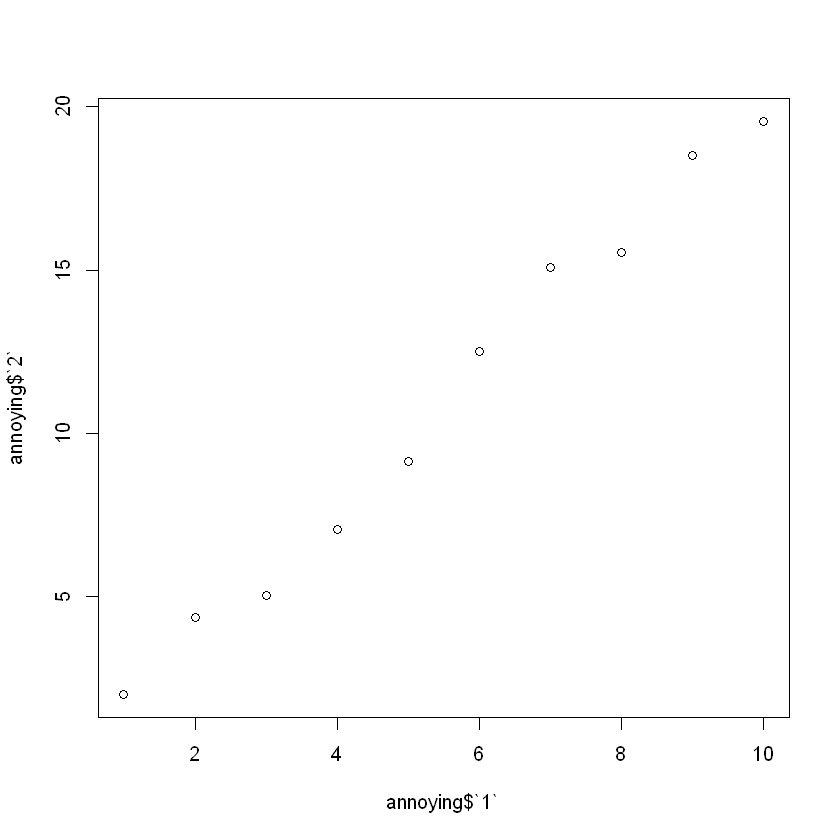

In [23]:
plot(annoying$`1`, annoying$`2`)

In [24]:
annoying$`3` = annoying$`2` / annoying$`1`

In [25]:
annoying$`3`

[1] 2.009973 2.184826 1.676643 1.767114 1.830366 2.087257 2.155826 1.943787
 [9] 2.055948 1.955447

In [26]:
names(annoying) = c("one", "two", "three")

In [27]:
annoying

one,two,three
1,2.009973,2.009973
2,4.369652,2.184826
3,5.029929,1.676643
4,7.068456,1.767114
5,9.151830,1.830366
6,12.523541,2.087257
7,15.090779,2.155826
8,15.550297,1.943787
9,18.503531,2.055948
10,19.554473,1.955447


What does tibble::enframe() do? When might you use it?

In [32]:
?tibble::enframe()


根据运行结果表明`enframe()`函数是将原子向量转为数据框。
（Converting atomic vectors to data frames, and vice versa）

**接下来让我们回到原来的话题，dplyr**

### 数据

**数据介绍**

This is a cleaned up version of a gene expression dataset from [Brauer et al. Coordination of Growth Rate, Cell Cycle, Stress Response, and Metabolic Activity in Yeast (2008) Mol Biol Cell 19:352-367](http://www.ncbi.nlm.nih.gov/pubmed/17959824). This data is from a gene expression microarray, and in this paper the authors are examining the relationship between growth rate and gene expression in yeast cultures limited by one of six different nutrients (glucose, leucine, ammonium, sulfate, phosphate, uracil). If you give yeast a rich media loaded with nutrients except restrict the supply of a single nutrient, you can control the growth rate to any rate you choose. By starving yeast of specific nutrients you can find genes that:

- **Raise or lower their expression in response to growth rate.** Growth-rate dependent expression patterns can tell us a lot about cell cycle control, and how the cell responds to stress. The authors found that expression of >25% of all yeast genes is linearly correlated with growth rate, independent of the limiting nutrient. They also found that the subset of negatively growth-correlated genes is enriched for peroxisomal functions, and positively correlated genes mainly encode ribosomal functions.
- **Respond differently when different nutrients are being limited.** If you see particular genes that respond very differently when a nutrient is sharply restricted, these genes might be involved in the transport or metabolism of that specific nutrient.


下载清洗后的数据[brauer2007_tidy.csv](http://bioconnector.org/workshops/data/brauer2007_tidy.csv)，你也可以在我当前文件目录下找到。

### 读入数据

需要导入`dplyr`与`readr`两个包，确保在继续下面学习之前安装好它们。

In [33]:
# 导入包
library(readr)
library(dplyr)

In [34]:
# 读入数据
ydat = read_csv(file="./brauer2007_tidy.csv")

Parsed with column specification:
cols(
  symbol = col_character(),
  systematic_name = col_character(),
  nutrient = col_character(),
  rate = col_double(),
  expression = col_double(),
  bp = col_character(),
  mf = col_character()
)


In [35]:
# 显示数据
ydat

symbol,systematic_name,nutrient,rate,expression,bp,mf
SFB2,YNL049C,Glucose,0.05,-0.24,ER to Golgi transport,molecular function unknown
NA,YNL095C,Glucose,0.05,0.28,biological process unknown,molecular function unknown
QRI7,YDL104C,Glucose,0.05,-0.02,proteolysis and peptidolysis,metalloendopeptidase activity
CFT2,YLR115W,Glucose,0.05,-0.33,mRNA polyadenylylation*,RNA binding
SSO2,YMR183C,Glucose,0.05,0.05,vesicle fusion*,t-SNARE activity
PSP2,YML017W,Glucose,0.05,-0.69,biological process unknown,molecular function unknown
RIB2,YOL066C,Glucose,0.05,-0.55,riboflavin biosynthesis,pseudouridylate synthase activity*
VMA13,YPR036W,Glucose,0.05,-0.75,vacuolar acidification,"hydrogen-transporting ATPase activity, rotational mechanism"
EDC3,YEL015W,Glucose,0.05,-0.24,deadenylylation-independent decapping,molecular function unknown
VPS5,YOR069W,Glucose,0.05,-0.16,protein retention in Golgi*,protein transporter activity


In [36]:
# 如果你觉得看得不爽，可以直接在Rstudio的交互式窗口看
# View(ydat)

## dplyr包

[`dplyr`包](https://github.com/hadley/dplyr)是一个相对比较新的R包，它使得数据操作变得更快更简单。它引入了所谓的`magrittr`包的功能特性，使得我们可以将所有的命令串成一个管道，这将改变我们对思考问题进行编写程序的方式。

当我们使用`read_csv()`函数读入数据的时候会自动加载`dplyr`包，读入的数据将被存为一个特殊的数据框，称为`tbl`（发音为"tibble"），这个可以使用`class(ydat)`进行查看。如果你有其他的标准表格数据，可以使用`as_tibble()`函数将它转换为`tbl`，它的数据显示效果更好。

除了上面我介绍的tibble，还可以查看[`tibbles vignette`](https://cran.r-project.org/web/packages/tibble/vignettes/tibble.html)。

## dplyr动词

dplyr包给出了一些有用的**动词**用于管理数据。下面是一些我们这篇文章内容中会使用的*单表格*动词。（**单表格**动词意思是只处理单个表格的动词——相比于**双表格**动词用于连接数据）

1. `filter()`
2. `select()`
3. `mutate()`
4. `arrange()`
5. `summarize()`
6. `group_by()`

这些函数的第一个输入参数都是数据框或者tibble，它们都会返回一个数据框或者tibble作为结果输出。

### filter()

如果你想要过滤数据中一些条件是真的**行**，使用`filter()`函数。

第一个参数是输入数据集，第二个是条件。

下面让我们实际操作一下，看一下[LEU1](http://www.yeastgenome.org/locus/Leu1/overview)，一个涉及白氨酸合成的基因。

In [37]:
# 确保导入了dplyr包
library(dplyr)

# 查看涉及白氨酸合成通路的一个基因
filter(ydat, symbol == "LEU1")

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU1,YGL009C,Glucose,0.05,-1.12,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.10,-0.77,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.15,-0.67,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.20,-0.59,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.25,-0.20,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.30,0.03,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Ammonia,0.05,-0.76,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Ammonia,0.10,-1.17,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Ammonia,0.15,-1.20,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Ammonia,0.20,-1.02,leucine biosynthesis,3-isopropylmalate dehydratase activity


In [38]:
# 查看多个基因
filter(ydat, symbol == "LEU1" | symbol == "ADH2")

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU1,YGL009C,Glucose,0.05,-1.12,leucine biosynthesis,3-isopropylmalate dehydratase activity
ADH2,YMR303C,Glucose,0.05,6.28,fermentation*,alcohol dehydrogenase activity
LEU1,YGL009C,Glucose,0.10,-0.77,leucine biosynthesis,3-isopropylmalate dehydratase activity
ADH2,YMR303C,Glucose,0.10,5.81,fermentation*,alcohol dehydrogenase activity
LEU1,YGL009C,Glucose,0.15,-0.67,leucine biosynthesis,3-isopropylmalate dehydratase activity
ADH2,YMR303C,Glucose,0.15,5.64,fermentation*,alcohol dehydrogenase activity
LEU1,YGL009C,Glucose,0.20,-0.59,leucine biosynthesis,3-isopropylmalate dehydratase activity
ADH2,YMR303C,Glucose,0.20,5.10,fermentation*,alcohol dehydrogenase activity
LEU1,YGL009C,Glucose,0.25,-0.20,leucine biosynthesis,3-isopropylmalate dehydratase activity
ADH2,YMR303C,Glucose,0.25,1.89,fermentation*,alcohol dehydrogenase activity


**注意**，因为我是用jupyter notebook写的，有些输入的注释信息没有输出来，最好自己在rstudio试试。

In [39]:
# 查看由于营养缺失导致低生长率的LEU1表达水平
# 注意白氨酸缺失时LEU1会高度上调
filter(ydat, symbol == "LEU1" & rate == .05)

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU1,YGL009C,Glucose,0.05,-1.12,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Ammonia,0.05,-0.76,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Phosphate,0.05,-0.81,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Sulfate,0.05,-1.57,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.05,3.84,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Uracil,0.05,-2.07,leucine biosynthesis,3-isopropylmalate dehydratase activity


In [41]:
# 但是生长/营养限制解除后表达会下降
filter(ydat, symbol == "LEU1" & rate == .3)

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU1,YGL009C,Glucose,0.3,0.03,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Ammonia,0.3,-0.22,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Phosphate,0.3,-0.07,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Sulfate,0.3,-0.76,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.3,0.87,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Uracil,0.3,-0.16,leucine biosynthesis,3-isopropylmalate dehydratase activity


In [42]:
# 仅显示LEU1和Leucine缺失的数据
filter(ydat, symbol == "LEU1" & nutrient == "Leucine")

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU1,YGL009C,Leucine,0.05,3.84,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.10,3.36,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.15,3.24,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.20,2.84,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.25,2.04,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.30,0.87,leucine biosynthesis,3-isopropylmalate dehydratase activity


In [43]:
# 当其他营养缺失时LEU1表达如何？
filter(ydat, symbol == "LEU1" & nutrient == "Glucose")

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU1,YGL009C,Glucose,0.05,-1.12,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.10,-0.77,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.15,-0.67,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.20,-0.59,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.25,-0.20,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Glucose,0.30,0.03,leucine biosynthesis,3-isopropylmalate dehydratase activity


**让我们用图形显示看看**

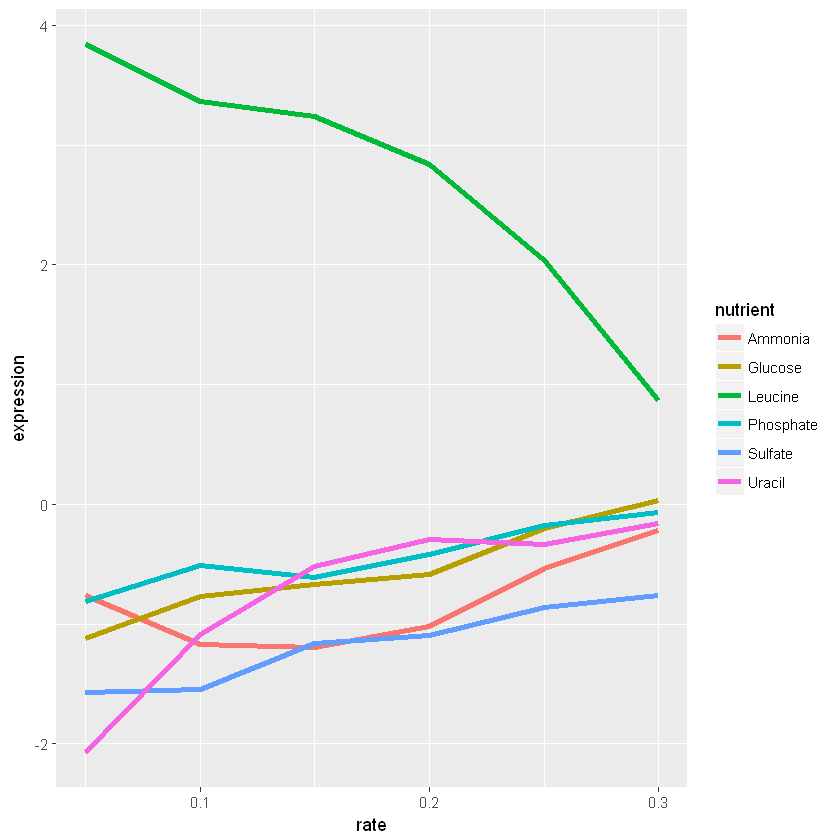

In [44]:
library(ggplot2)
filter(ydat, symbol == "LEU1") %>%
    ggplot(aes(rate, expression, colour=nutrient)) + geom_line(lwd=1.5)

**仔细看看，当leucine缺失时LEU1高度表达，因为细胞必须自己合成。**

#### EXERCISE 1

1. Display the data where the gene ontology biological process (the bp variable) is “leucine biosynthesis” (case-sensitive) and the limiting nutrient was Leucine. (Answer should return a 24-by-7 data frame – 4 genes × 6 growth rates).
2. Gene/rate combinations had high expression (in the top 1% of expressed genes)? Hint: see ?quantile and try quantile(ydat$expression, probs=.99) to see the expression value which is higher than 99% of all the data, then filter() based on that. Try wrapping your answer with a View() function so you can see the whole thing. What does it look like those genes are doing? Answer should return a 1971-by-7 data frame.

In [45]:
# 习题1
filter(ydat, bp == "leucine biosynthesis" & nutrient == "Leucine")

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU9,YOR108W,Leucine,0.05,0.44,leucine biosynthesis,2-isopropylmalate synthase activity
LEU1,YGL009C,Leucine,0.05,3.84,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU2,YCL018W,Leucine,0.05,1.54,leucine biosynthesis,3-isopropylmalate dehydrogenase activity
LEU4,YNL104C,Leucine,0.05,1.94,leucine biosynthesis,2-isopropylmalate synthase activity
LEU9,YOR108W,Leucine,0.10,0.57,leucine biosynthesis,2-isopropylmalate synthase activity
LEU1,YGL009C,Leucine,0.10,3.36,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU2,YCL018W,Leucine,0.10,1.23,leucine biosynthesis,3-isopropylmalate dehydrogenase activity
LEU4,YNL104C,Leucine,0.10,1.71,leucine biosynthesis,2-isopropylmalate synthase activity
LEU9,YOR108W,Leucine,0.15,0.46,leucine biosynthesis,2-isopropylmalate synthase activity
LEU1,YGL009C,Leucine,0.15,3.24,leucine biosynthesis,3-isopropylmalate dehydratase activity


In [47]:
# 习题2
str(ydat) # 先看看数据

Classes 'tbl_df', 'tbl' and 'data.frame':	198430 obs. of  7 variables:
 $ symbol         : chr  "SFB2" NA "QRI7" "CFT2" ...
 $ systematic_name: chr  "YNL049C" "YNL095C" "YDL104C" "YLR115W" ...
 $ nutrient       : chr  "Glucose" "Glucose" "Glucose" "Glucose" ...
 $ rate           : num  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 ...
 $ expression     : num  -0.24 0.28 -0.02 -0.33 0.05 -0.69 -0.55 -0.75 -0.24 -0.16 ...
 $ bp             : chr  "ER to Golgi transport" "biological process unknown" "proteolysis and peptidolysis" "mRNA polyadenylylation*" ...
 $ mf             : chr  "molecular function unknown" "molecular function unknown" "metalloendopeptidase activity" "RNA binding" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 7
  .. ..$ symbol         : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ systematic_name: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ nutrient       : list()
  .. .. ..

In [49]:
quantile(ydat$expression, probs=.99)

99% 
2.07

In [50]:
str(filter(ydat, expression > quantile(ydat$expression, probs=.99)))

Classes 'tbl_df', 'tbl' and 'data.frame':	1971 obs. of  7 variables:
 $ symbol         : chr  "ATO3" NA NA NA ...
 $ systematic_name: chr  "YDR384C" "YKL187C" "YGL117W" "YBR047W" ...
 $ nutrient       : chr  "Glucose" "Glucose" "Glucose" "Glucose" ...
 $ rate           : num  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 ...
 $ expression     : num  2.27 4.13 2.3 2.14 3.71 2.4 3.22 2.19 2.38 2.54 ...
 $ bp             : chr  "transport*" "biological process unknown" "biological process unknown" "biological process unknown" ...
 $ mf             : chr  "transporter activity" "molecular function unknown" "molecular function unknown" "molecular function unknown" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 7
  .. ..$ symbol         : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ systematic_name: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ nutrient       : list()
  .. .. ..- attr(*, "class")= chr 

**可以看到结果跟提示的一致**，这里我没有输出所有结果，比较多，如果你想查看所有的结果，去掉最外层的`str()`函数。

#### 旁白：将数据写入文件

既然有`read.csv`对应的`read_csv`函数（我们这里使用的），当然也有`write.csv`对应的`write_csv`函数啦。

下面我将部分数据存储为新对象并写入磁盘文件：

In [53]:
# 将结果赋给新对象
leudat = filter(ydat, nutrient == "Leucine" & bp == "leucine biosynthesis")

In [55]:
str(leudat) # 确保前面的没写错

Classes 'tbl_df', 'tbl' and 'data.frame':	24 obs. of  7 variables:
 $ symbol         : chr  "LEU9" "LEU1" "LEU2" "LEU4" ...
 $ systematic_name: chr  "YOR108W" "YGL009C" "YCL018W" "YNL104C" ...
 $ nutrient       : chr  "Leucine" "Leucine" "Leucine" "Leucine" ...
 $ rate           : num  0.05 0.05 0.05 0.05 0.1 0.1 0.1 0.1 0.15 0.15 ...
 $ expression     : num  0.44 3.84 1.54 1.94 0.57 3.36 1.23 1.71 0.46 3.24 ...
 $ bp             : chr  "leucine biosynthesis" "leucine biosynthesis" "leucine biosynthesis" "leucine biosynthesis" ...
 $ mf             : chr  "2-isopropylmalate synthase activity" "3-isopropylmalate dehydratase activity" "3-isopropylmalate dehydrogenase activity" "2-isopropylmalate synthase activity" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 7
  .. ..$ symbol         : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ systematic_name: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ nutrient

In [56]:
# 将结果写入磁盘
write_csv(leudat, "leucinedata.csv")

### select()

前面我们看到了`filter()`函数用来返回匹配行，`select()`则是用来返回匹配列的。这有点像`subset()`函数的`select`参数吧。

In [61]:
# 仅仅选择symbol 和 systematic_name
head(select(ydat, symbol, systematic_name)) # 加了个head防止显示太多

symbol,systematic_name
SFB2,YNL049C
NA,YNL095C
QRI7,YDL104C
CFT2,YLR115W
SSO2,YMR183C
PSP2,YML017W


In [59]:
# 可以这样移除列
head(select(ydat, -bp, -mf)) # 加了个head防止显示太多

symbol,systematic_name,nutrient,rate,expression
SFB2,YNL049C,Glucose,0.05,-0.24
NA,YNL095C,Glucose,0.05,0.28
QRI7,YDL104C,Glucose,0.05,-0.02
CFT2,YLR115W,Glucose,0.05,-0.33
SSO2,YMR183C,Glucose,0.05,0.05
PSP2,YML017W,Glucose,0.05,-0.69


**注意**进行了上面操作后，原始数据ydat没有改变！相当于先生成了一个拷贝，进拷贝进行了修改。

In [62]:
# 如果我们要保存上述数据
nogo = select(ydat, -bp, -mf)

In [63]:
str(nogo)

Classes 'tbl_df', 'tbl' and 'data.frame':	198430 obs. of  5 variables:
 $ symbol         : chr  "SFB2" NA "QRI7" "CFT2" ...
 $ systematic_name: chr  "YNL049C" "YNL095C" "YDL104C" "YLR115W" ...
 $ nutrient       : chr  "Glucose" "Glucose" "Glucose" "Glucose" ...
 $ rate           : num  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 ...
 $ expression     : num  -0.24 0.28 -0.02 -0.33 0.05 -0.69 -0.55 -0.75 -0.24 -0.16 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 7
  .. ..$ symbol         : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ systematic_name: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ nutrient       : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ rate           : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ expression     : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ bp    

In [64]:
# 我们可以过滤这个新的数据集
filter(nogo, symbol == "LEU1" & rate == .05)

symbol,systematic_name,nutrient,rate,expression
LEU1,YGL009C,Glucose,0.05,-1.12
LEU1,YGL009C,Ammonia,0.05,-0.76
LEU1,YGL009C,Phosphate,0.05,-0.81
LEU1,YGL009C,Sulfate,0.05,-1.57
LEU1,YGL009C,Leucine,0.05,3.84
LEU1,YGL009C,Uracil,0.05,-2.07


### mutate()

mutate()函数用来给数据添加新的列。**记住，这些函数都不会修改操作的数据。**

>The expression level reported here is the log2 of the sample signal divided by the signal in the reference channel, where the reference RNA for all samples was taken from the glucose-limited chemostat grown at a dilution rate of 0.25 h−1. Let’s mutate this data to add a new variable called “signal” that’s the actual raw signal ratio instead of the log-transformed signal.

意思是让我们添加新的一列，它的数值是表达的原始信号值。

In [66]:
head(mutate(nogo, signal = 2^expression))

symbol,systematic_name,nutrient,rate,expression,signal
SFB2,YNL049C,Glucose,0.05,-0.24,0.8467453
NA,YNL095C,Glucose,0.05,0.28,1.2141949
QRI7,YDL104C,Glucose,0.05,-0.02,0.9862327
CFT2,YLR115W,Glucose,0.05,-0.33,0.7955365
SSO2,YMR183C,Glucose,0.05,0.05,1.0352649
PSP2,YML017W,Glucose,0.05,-0.69,0.6198538


In [68]:
# 我们可以继续往后面加变量
head(mutate(nogo, signal = 2^expression, sigsr = sqrt(signal))) # 注意喔，最后的变量是基于第一个生成的变量，有点意思呢

symbol,systematic_name,nutrient,rate,expression,signal,sigsr
SFB2,YNL049C,Glucose,0.05,-0.24,0.8467453,0.9201877
NA,YNL095C,Glucose,0.05,0.28,1.2141949,1.1019051
QRI7,YDL104C,Glucose,0.05,-0.02,0.9862327,0.9930925
CFT2,YLR115W,Glucose,0.05,-0.33,0.7955365,0.8919285
SSO2,YMR183C,Glucose,0.05,0.05,1.0352649,1.0174797
PSP2,YML017W,Glucose,0.05,-0.69,0.6198538,0.7873080


关于画图，我们后面再讲，这里看看我们为啥用对数化的值来取代原始信号呢？

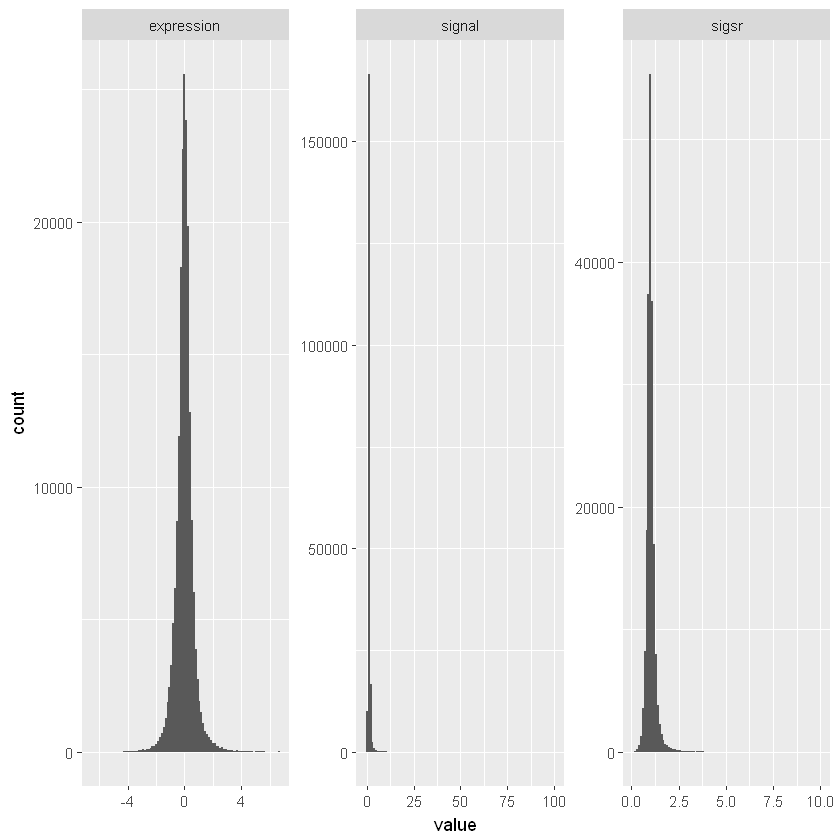

In [69]:
library(tidyr)
mutate(nogo, signal=2^expression, sigsr=sqrt(signal)) %>%
    gather(unit, value, expression:sigsr) %>%
    ggplot(aes(value)) + geom_histogram(bins=100) + facet_wrap(~unit, scales="free")

**很显然第一个更接近正态分布，所以进行分析和检验的效果最好**

### arrange()

arrange()函数听名字就知道它要做的事情了。它对感兴趣的列进行排列（或者说排序），第一个参数是数据，后面的是排序变量，可以使用`desc()`函数进行降序排列。


In [72]:
# 通过gene symbol排序
head(arrange(ydat, symbol))

symbol,systematic_name,nutrient,rate,expression,bp,mf
AAC1,YMR056C,Glucose,0.05,1.50,aerobic respiration*,ATP:ADP antiporter activity
AAC1,YMR056C,Glucose,0.10,1.54,aerobic respiration*,ATP:ADP antiporter activity
AAC1,YMR056C,Glucose,0.15,1.16,aerobic respiration*,ATP:ADP antiporter activity
AAC1,YMR056C,Glucose,0.20,1.04,aerobic respiration*,ATP:ADP antiporter activity
AAC1,YMR056C,Glucose,0.25,0.84,aerobic respiration*,ATP:ADP antiporter activity
AAC1,YMR056C,Glucose,0.30,0.01,aerobic respiration*,ATP:ADP antiporter activity


In [73]:
# 按表达值，默认升序排列
head(arrange(ydat, expression))

symbol,systematic_name,nutrient,rate,expression,bp,mf
SUL1,YBR294W,Phosphate,0.05,-6.50,sulfate transport,sulfate transporter activity
SUL1,YBR294W,Phosphate,0.10,-6.34,sulfate transport,sulfate transporter activity
ADH2,YMR303C,Phosphate,0.10,-6.15,fermentation*,alcohol dehydrogenase activity
ADH2,YMR303C,Phosphate,0.30,-6.04,fermentation*,alcohol dehydrogenase activity
ADH2,YMR303C,Phosphate,0.25,-5.89,fermentation*,alcohol dehydrogenase activity
SUL1,YBR294W,Uracil,0.05,-5.55,sulfate transport,sulfate transporter activity


In [74]:
# 降序
head(arrange(ydat, desc(expression)))

symbol,systematic_name,nutrient,rate,expression,bp,mf
GAP1,YKR039W,Ammonia,0.05,6.64,amino acid transport*,L-proline permease activity*
DAL5,YJR152W,Ammonia,0.05,6.64,allantoate transport,allantoate transporter activity
GAP1,YKR039W,Ammonia,0.10,6.64,amino acid transport*,L-proline permease activity*
DAL5,YJR152W,Ammonia,0.10,6.64,allantoate transport,allantoate transporter activity
DAL5,YJR152W,Ammonia,0.15,6.64,allantoate transport,allantoate transporter activity
DAL5,YJR152W,Ammonia,0.20,6.64,allantoate transport,allantoate transporter activity


#### EXERCISE 2

1. First, re-run the command you used above to filter the data for genes involved in the “leucine biosynthesis” biological process and where the limiting nutrient is Leucine.
2. Wrap this entire filtered result with a call to arrange() where you’ll arrange the result of #1 by the gene symbol.
3. Wrap this entire result in a View() statement so you can see the entire result.


In [2]:
library(tidyverse) # 这是第二次接着学习，我先导入包

In [3]:
ydat = read_csv(file="./brauer2007_tidy.csv")

Parsed with column specification:
cols(
  symbol = col_character(),
  systematic_name = col_character(),
  nutrient = col_character(),
  rate = col_double(),
  expression = col_double(),
  bp = col_character(),
  mf = col_character()
)


In [4]:
leudat = filter(ydat, nutrient == "Leucine" & bp == "leucine biosynthesis") # 习题1

In [5]:
head(leudat)

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU9,YOR108W,Leucine,0.05,0.44,leucine biosynthesis,2-isopropylmalate synthase activity
LEU1,YGL009C,Leucine,0.05,3.84,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU2,YCL018W,Leucine,0.05,1.54,leucine biosynthesis,3-isopropylmalate dehydrogenase activity
LEU4,YNL104C,Leucine,0.05,1.94,leucine biosynthesis,2-isopropylmalate synthase activity
LEU9,YOR108W,Leucine,0.10,0.57,leucine biosynthesis,2-isopropylmalate synthase activity
LEU1,YGL009C,Leucine,0.10,3.36,leucine biosynthesis,3-isopropylmalate dehydratase activity


In [6]:
head(arrange(leudat, symbol)) # 习题2

symbol,systematic_name,nutrient,rate,expression,bp,mf
LEU1,YGL009C,Leucine,0.05,3.84,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.10,3.36,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.15,3.24,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.20,2.84,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.25,2.04,leucine biosynthesis,3-isopropylmalate dehydratase activity
LEU1,YGL009C,Leucine,0.30,0.87,leucine biosynthesis,3-isopropylmalate dehydratase activity


In [8]:
# 习题3，这里jupyter notebook不支持，需要在rstudio中运行
# View(leudat) 

### summarize()

这个函数顾名思义是用来总结数据的。

In [9]:
# 获取所有基因的平均表达值
summarize(ydat, mean(expression))

mean(expression)
0.003367182


In [10]:
# 发现列名不是很好用，我们改改
summarize(ydat, meanexp=mean(expression))

meanexp
0.003367182


In [11]:
# 计算生长率和表达的相关性
summarize(ydat, r=cor(rate, expression))

r
-0.02197312


In [12]:
# 获取观测值的数目
summarize(ydat, n())

n()
198430


In [13]:
# 获取数据中有唯一基因符号的数目（就是有重叠的行都看作一）
summarize(ydat, n_distinct(symbol))

n_distinct(symbol)
4211


### Group_by()

从上次操作中我们发现`summarize()`函数本身并不是非常有用。`group_by()`函数也是如此，它将已知数据框转换为分组的数据框。

In [15]:
head(ydat, 10) 

symbol,systematic_name,nutrient,rate,expression,bp,mf
SFB2,YNL049C,Glucose,0.05,-0.24,ER to Golgi transport,molecular function unknown
NA,YNL095C,Glucose,0.05,0.28,biological process unknown,molecular function unknown
QRI7,YDL104C,Glucose,0.05,-0.02,proteolysis and peptidolysis,metalloendopeptidase activity
CFT2,YLR115W,Glucose,0.05,-0.33,mRNA polyadenylylation*,RNA binding
SSO2,YMR183C,Glucose,0.05,0.05,vesicle fusion*,t-SNARE activity
PSP2,YML017W,Glucose,0.05,-0.69,biological process unknown,molecular function unknown
RIB2,YOL066C,Glucose,0.05,-0.55,riboflavin biosynthesis,pseudouridylate synthase activity*
VMA13,YPR036W,Glucose,0.05,-0.75,vacuolar acidification,"hydrogen-transporting ATPase activity, rotational mechanism"
EDC3,YEL015W,Glucose,0.05,-0.24,deadenylylation-independent decapping,molecular function unknown
VPS5,YOR069W,Glucose,0.05,-0.16,protein retention in Golgi*,protein transporter activity


In [17]:
head(group_by(ydat, nutrient),10)

symbol,systematic_name,nutrient,rate,expression,bp,mf
SFB2,YNL049C,Glucose,0.05,-0.24,ER to Golgi transport,molecular function unknown
NA,YNL095C,Glucose,0.05,0.28,biological process unknown,molecular function unknown
QRI7,YDL104C,Glucose,0.05,-0.02,proteolysis and peptidolysis,metalloendopeptidase activity
CFT2,YLR115W,Glucose,0.05,-0.33,mRNA polyadenylylation*,RNA binding
SSO2,YMR183C,Glucose,0.05,0.05,vesicle fusion*,t-SNARE activity
PSP2,YML017W,Glucose,0.05,-0.69,biological process unknown,molecular function unknown
RIB2,YOL066C,Glucose,0.05,-0.55,riboflavin biosynthesis,pseudouridylate synthase activity*
VMA13,YPR036W,Glucose,0.05,-0.75,vacuolar acidification,"hydrogen-transporting ATPase activity, rotational mechanism"
EDC3,YEL015W,Glucose,0.05,-0.24,deadenylylation-independent decapping,molecular function unknown
VPS5,YOR069W,Glucose,0.05,-0.16,protein retention in Golgi*,protein transporter activity


In [18]:
head(group_by(ydat, nutrient, rate),10) # 看起来跟上面结果没差别，这个可能需要多看一些行

symbol,systematic_name,nutrient,rate,expression,bp,mf
SFB2,YNL049C,Glucose,0.05,-0.24,ER to Golgi transport,molecular function unknown
NA,YNL095C,Glucose,0.05,0.28,biological process unknown,molecular function unknown
QRI7,YDL104C,Glucose,0.05,-0.02,proteolysis and peptidolysis,metalloendopeptidase activity
CFT2,YLR115W,Glucose,0.05,-0.33,mRNA polyadenylylation*,RNA binding
SSO2,YMR183C,Glucose,0.05,0.05,vesicle fusion*,t-SNARE activity
PSP2,YML017W,Glucose,0.05,-0.69,biological process unknown,molecular function unknown
RIB2,YOL066C,Glucose,0.05,-0.55,riboflavin biosynthesis,pseudouridylate synthase activity*
VMA13,YPR036W,Glucose,0.05,-0.75,vacuolar acidification,"hydrogen-transporting ATPase activity, rotational mechanism"
EDC3,YEL015W,Glucose,0.05,-0.24,deadenylylation-independent decapping,molecular function unknown
VPS5,YOR069W,Glucose,0.05,-0.16,protein retention in Golgi*,protein transporter activity


**真正非常有用的是将`group_by()`与`summarize`结合起来使用。**

In [19]:
# 求取每个基因的平均表达值
summarize(group_by(ydat, symbol), meanexp=mean(expression))

symbol,meanexp
AAC1,0.528888889
AAC3,-0.216285714
AAD10,0.438333333
AAD14,-0.071666667
AAD16,0.241944444
AAD4,-0.791666667
AAD6,0.290277778
AAH1,0.046111111
AAP1,-0.003611111
AAP1',-0.421388889


In [20]:
# 获取每一种营养物质生长率与表达值的相关性
summarize(group_by(ydat, nutrient), r=cor(rate, expression))

nutrient,r
Ammonia,-0.01752025
Glucose,-0.01119529
Leucine,-0.03837677
Phosphate,-0.01935061
Sulfate,-0.01664016
Uracil,-0.03534036


## %>%管道

### %>%怎么工作

dplyr包从magrittr包导入了一些功能特性，使得我们可以将函数的输出输送到另一个函数的输入，因此我们可以避免使用非常复杂的嵌套函数。它看起来就是`^%>%`，安装好dplyr包导入即可使用。

下面是一个简单的例子，两种操作结果一致，我们仔细观察和体会实现的不同。

In [21]:
tail(ydat, 5)

symbol,systematic_name,nutrient,rate,expression,bp,mf
KRE1,YNL322C,Uracil,0.3,0.28,cell wall organization and biogenesis,structural constituent of cell wall
MTL1,YGR023W,Uracil,0.3,0.27,cell wall organization and biogenesis,molecular function unknown
KRE9,YJL174W,Uracil,0.3,0.43,cell wall organization and biogenesis*,molecular function unknown
UTH1,YKR042W,Uracil,0.3,0.19,mitochondrion organization and biogenesis*,molecular function unknown
NA,YOL111C,Uracil,0.3,0.04,biological process unknown,molecular function unknown


In [22]:
ydat %>% tail(5)

symbol,systematic_name,nutrient,rate,expression,bp,mf
KRE1,YNL322C,Uracil,0.3,0.28,cell wall organization and biogenesis,structural constituent of cell wall
MTL1,YGR023W,Uracil,0.3,0.27,cell wall organization and biogenesis,molecular function unknown
KRE9,YJL174W,Uracil,0.3,0.43,cell wall organization and biogenesis*,molecular function unknown
UTH1,YKR042W,Uracil,0.3,0.19,mitochondrion organization and biogenesis*,molecular function unknown
NA,YOL111C,Uracil,0.3,0.04,biological process unknown,molecular function unknown


我们使用一个dplyr包动词：

In [23]:
ydat %>% filter(nutrient=="Leucine")

symbol,systematic_name,nutrient,rate,expression,bp,mf
SFB2,YNL049C,Leucine,0.05,0.18,ER to Golgi transport,molecular function unknown
NA,YNL095C,Leucine,0.05,0.16,biological process unknown,molecular function unknown
QRI7,YDL104C,Leucine,0.05,-0.30,proteolysis and peptidolysis,metalloendopeptidase activity
CFT2,YLR115W,Leucine,0.05,-0.27,mRNA polyadenylylation*,RNA binding
SSO2,YMR183C,Leucine,0.05,-0.59,vesicle fusion*,t-SNARE activity
PSP2,YML017W,Leucine,0.05,-0.17,biological process unknown,molecular function unknown
RIB2,YOL066C,Leucine,0.05,-0.02,riboflavin biosynthesis,pseudouridylate synthase activity*
VMA13,YPR036W,Leucine,0.05,-0.11,vacuolar acidification,"hydrogen-transporting ATPase activity, rotational mechanism"
EDC3,YEL015W,Leucine,0.05,0.12,deadenylylation-independent decapping,molecular function unknown
VPS5,YOR069W,Leucine,0.05,-0.20,protein retention in Golgi*,protein transporter activity


### 嵌套比对%>%

我们来为一个问题思考一分钟：要是我们想要获得每一种营养条件下涉及白氨酸合成通路中基因表达与生长率的相关性。我们可能会这么做：

0. 取得`ydat`数据集
1. 然后使用`filter()`函数取得涉及白氨酸合成通路的基因
2. 然后使用`group_by()`函数处理限定的营养物质
3. 然后`summarize()`总结获得生长率和表达的相关
4. 然后使用`mutate()`将结果保留两位有效数字
5. 然后使用`arrange()`对相关系数进行排序

**我们来看看用我们上述的认知去实现它和管道实现它的差别**

![](dplyr-pipeline.png)

**dplyr的处理方式很干净易懂**

In [24]:
ydat %>% 
  filter(bp=="leucine biosynthesis") %>%
  group_by(nutrient) %>% 
  summarize(r=cor(rate, expression)) %>% 
  mutate(r=round(r,2)) %>% 
  arrange(r)

nutrient,r
Leucine,-0.58
Glucose,-0.04
Ammonia,0.16
Sulfate,0.33
Phosphate,0.44
Uracil,0.58


### 管道操作练习

下面练习热热身。

In [25]:
# 找出ADH2基因的生长率为0.05时的营养和表达值
# Hint: filter and select
# 我们先找基因ADH2再取列值
ydat %>% 
filter(symbol == "ADH2" & rate == 0.05) %>%
select(nutrient, expression)

nutrient,expression
Glucose,6.28
Ammonia,0.55
Phosphate,-4.60
Sulfate,-1.18
Leucine,4.15
Uracil,0.63


In [1]:
# 营养限定为Glucose，生长率限定为0.05时表达值最高的4个基因
# 仅仅显示基因符号，表达值，GO terms
# Hint: filter, arrange, head, select
library(tidyverse)
ydat = read_csv(file="./brauer2007_tidy.csv")
ydat %>%
filter(nutrient == "Glucose" & rate == 0.05) %>%
arrange(desc(expression)) %>%
head(4) %>%
select(symbol, expression, bp, mf)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.3.4     √ dplyr   0.7.4
√ tidyr   0.7.2     √ stringr 1.2.0
√ readr   1.1.1     √ forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  symbol = col_character(),
  systematic_name = col_character(),
  nutrient = col_character(),
  rate = col_double(),
  expression = col_double(),
  bp = col_character(),
  mf = col_character()
)


symbol,expression,bp,mf
ADH2,6.28,fermentation*,alcohol dehydrogenase activity
HSP26,5.86,response to stress*,unfolded protein binding
MLS1,5.64,glyoxylate cycle,malate synthase activity
HXT5,5.56,hexose transport,glucose transporter activity*


In [6]:
# 当生长率限定为0.05时，每种营养条件下在response to stress通路中每个基因的平均表达值时多少？
# protein biosynthesis通路呢？
# Hint: filter, group_by, summary
ydat %>%
filter(rate == 0.05 & bp == "response to stress") %>%
group_by(nutrient) %>%
summarize(meanexp=mean(expression))

nutrient,meanexp
Ammonia,0.9426667
Glucose,0.7426667
Leucine,0.8106667
Phosphate,0.9806667
Sulfate,0.7430769
Uracil,0.7313333


In [7]:
ydat %>%
filter(rate == 0.05 & bp == "protein biosynthesis") %>%
group_by(nutrient) %>%
summarize(meanexp=mean(expression))

nutrient,meanexp
Ammonia,-1.6133514
Glucose,-0.6911351
Leucine,-0.5735676
Phosphate,-0.7496216
Sulfate,-0.9134807
Uracil,-0.8799454


**让我们来试点更有难度的**

In [3]:
# 得到10个有最多基因关联的生物学过程？如果改成分子功能呢？
# Hint: group_by summarize n_distinct arrange head
ydat %>%
group_by(bp)%>%
summarize(n = n_distinct(symbol)) %>%
arrange(desc(n)) %>%
head(10)

bp,n
biological process unknown,269
protein biosynthesis,182
protein amino acid phosphorylation*,78
protein biosynthesis*,73
cell wall organization and biogenesis*,64
regulation of transcription from RNA polymerase II promoter*,49
"nuclear mRNA splicing, via spliceosome",47
DNA repair*,44
aerobic respiration*,42
ER to Golgi transport*,42


In [4]:
ydat %>%
group_by(mf)%>%
summarize(n = n_distinct(symbol)) %>%
arrange(desc(n)) %>%
head(10)

mf,n
molecular function unknown,886
structural constituent of ribosome,185
protein binding,107
RNA binding,63
protein binding*,53
DNA binding*,44
structural molecule activity,43
GTPase activity,40
structural constituent of cytoskeleton,39
transcription factor activity,38


In [6]:
# 有多少基因我们知道涉及什么过程但我们不知道它是什么
# Hint: filter where bp!="biological process unknown" & mf=="molecular function unknown"
ydat %>%
filter(bp!="biological process unknown" & mf=="molecular function unknown") %>%
select(symbol, bp) %>%
distinct()

symbol,bp
SFB2,ER to Golgi transport
EDC3,deadenylylation-independent decapping
PER1,response to unfolded protein*
PEX25,peroxisome organization and biogenesis*
BNI5,cytokinesis*
CSN12,adaptation to pheromone during conjugation with cellular fusion
SEC39,secretory pathway
ABC1,ubiquinone biosynthesis
PRP46,"nuclear mRNA splicing, via spliceosome"
MAM3,mitochondrion organization and biogenesis*


In [12]:
# 限定生长率为0.05，营养为Glucose，哪一个BP通路上调最多？根据上调BP显示一个排序列表，平均表达值为2位有效数字
# Hint: filter, group_by, summarize, mutate, arrange
ydat %>%
filter(rate == 0.05 & nutrient=="Glucose") %>%
group_by(bp) %>%
summarize(meanexp=mean(expression)) %>%
mutate(meanexp=round(meanexp,2)) %>%
arrange(desc(meanexp))

bp,meanexp
fermentation*,6.28
glyoxylate cycle,5.29
oxygen and reactive oxygen species metabolism,5.04
fumarate transport*,5.03
acetyl-CoA biosynthesis*,4.32
gluconeogenesis,3.64
fatty acid beta-oxidation,3.57
lactate transport,3.48
carnitine metabolism,3.30
alcohol metabolism*,3.25


In [13]:
sessionInfo()

R version 3.4.2 (2017-09-28)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 15063)

Matrix products: default

locale:
[1] LC_COLLATE=Chinese (Simplified)_China.936 
[2] LC_CTYPE=Chinese (Simplified)_China.936   
[3] LC_MONETARY=Chinese (Simplified)_China.936
[4] LC_NUMERIC=C                              
[5] LC_TIME=Chinese (Simplified)_China.936    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2    forcats_0.2.0   stringr_1.2.0   dplyr_0.7.4    
 [5] purrr_0.2.4     readr_1.1.1     tidyr_0.7.2     tibble_1.3.4   
 [9] ggplot2_2.2.1   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.2-6     repr_0.12.0      reshape2_1.4.2   haven_1.1.0     
 [5] lattice_0.20-35  colorspace_1.3-2 rlang_0.1.4      foreign_0.8-69  
 [9] glue_1.1.1       modelr_0.1.1     readxl_1.0.0     uuid_0.1-2      
[13] bindr_0.1        plyr_1.8.4       munsell_0.4.3